In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import xarray as xr

def convert_excel_to_csv(folder_path):
    """
    Convert all Excel files in a folder to CSV and show their previews.
    
    Args:
        folder_path (str): Path to the folder containing Excel files
    """
    # Convert folder path to Path object
    folder = Path(folder_path)
    
    # Loop through all files in the folder
    for file in folder.glob('*.xlsx'):
        try:
            # Read the Excel file
            df = pd.read_excel(file)
            
            # Create CSV filename (same name, different extension)
            csv_path = file.with_suffix('.csv')
            
            # Save as CSV
            df.to_csv(csv_path, index=False)
            
            # Print information about the conversion
            print(f"\nConverted: {file.name} → {csv_path.name}")
            print(f"Shape: {df.shape}")
            print("\nPreview:")
            print(df.head())
            print("\n" + "="*50)
            
        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")

# Example usage:
# convert_excel_to_csv('data')

In [3]:
#convert_excel_to_csv('/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/')

In [4]:
mri  = pd.read_csv('/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')

mri.columns[:2]

Index(['participant_id', '0throw_1thcolumn'], dtype='object')

In [5]:
mri.columns[-5:]

Index(['196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn'],
      dtype='object')

In [6]:
df = pd.read_csv('/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
solutions = pd.read_csv('/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAINING_SOLUTIONS.csv')
# Extract numerical indices from column names
#df = df.iloc[:,1:]



In [7]:
df.sort_values(by='participant_id', ascending=True, inplace=True)
solutions.sort_values(by='participant_id', ascending=True, inplace=True)

print(df.shape)
print(solutions.shape)

(1213, 19901)
(1213, 3)


In [8]:
df.head(3)

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
867,00aIpNTbG5uh,0.047912,0.147614,0.035215,0.041143,0.070673,0.080293,0.063638,-0.016682,0.043650,...,0.066630,0.053134,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368
28,00fV0OyyoLfw,-0.003560,0.131635,0.067454,0.073367,0.013845,0.198074,0.038971,-0.109366,-0.034447,...,0.050297,-0.063647,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951
509,04X1eiS79T4B,-0.076074,0.162668,0.050365,0.035320,0.055263,0.047298,0.155932,0.012768,0.084281,...,-0.047927,0.089904,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812


# Initial observations about targets

In [9]:
print(solutions['ADHD_Outcome'].mean())
print(solutions['Sex_F'].mean())

0.685078318219291
0.34295136026380874


In [10]:
(solutions['ADHD_Outcome']*solutions['Sex_F']).mean()

0.20610057708161583

In [11]:
solutions.groupby('Sex_F')['ADHD_Outcome'].mean()

Sex_F
0    0.728984
1    0.600962
Name: ADHD_Outcome, dtype: float64

# Let's try to combine the targets with the brain region data

In [12]:
df_labeled = df.merge(solutions, how='inner', on='participant_id')
df_labeled.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,0.047912,0.147614,0.035215,0.041143,0.070673,0.080293,0.063638,-0.016682,0.043650,...,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368,1,0
1,00fV0OyyoLfw,-0.003560,0.131635,0.067454,0.073367,0.013845,0.198074,0.038971,-0.109366,-0.034447,...,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951,1,0
2,04X1eiS79T4B,-0.076074,0.162668,0.050365,0.035320,0.055263,0.047298,0.155932,0.012768,0.084281,...,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812,0,1
3,05ocQutkURd6,0.054913,0.160764,0.150480,0.113151,0.135581,0.118498,0.032319,-0.078683,-0.013995,...,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943,0,1
4,06YUNBA9ZRLq,0.100683,0.103170,0.046506,0.127893,0.075231,0.019648,0.116546,0.035825,0.044905,...,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322,1,0


In [13]:
region_pairs = []
for col in df_labeled.columns:
    try:
        i, j = col.split('throw_')
        i = int(i)  # Convert "0throw" → 0
        j = int(j.replace('thcolumn', ''))  # Convert "2thcolumn" → 2
        region_pairs.append((i, j))
    except ValueError:
        print(f"Skipping malformed column: {col}")

region_pairs = np.array(region_pairs)

# # Check if the number of extracted pairs matches the dataframe's width
# #assert len(region_pairs) == df_labeled.shape[1]


Skipping malformed column: participant_id
Skipping malformed column: ADHD_Outcome
Skipping malformed column: Sex_F


In [14]:
region_pairs.shape

(19900, 2)

In [15]:
np.random.rand(10, *(199,199)).shape

(10, 199, 199)

In [16]:
def reshape_to_matrix(patient_data):
    matrix = np.zeros((199, 199))  # Initialize 199x199 matrix
    
    for idx, (i, j) in enumerate(region_pairs):
        matrix[i, j - 1] = patient_data[idx]  # Subtract 1 from j

    return matrix


In [17]:
connectomes = np.array([reshape_to_matrix(row) for _, row in df.iloc[:,1:].iterrows()])

/var/folders/9v/6bsrztp11777s06bs8q25y2h0000gn/T/ipykernel_74153/1768268947.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  matrix[i, j - 1] = patient_data[idx]  # Subtract 1 from j


In [18]:
print(connectomes.shape)

(1213, 199, 199)


In [19]:
connectomes[0]

array([[ 4.79122847e-02,  1.47614054e-01,  3.52153165e-02, ...,
        -6.08229905e-03,  2.43801034e-02,  1.69569559e-02],
       [ 0.00000000e+00,  2.21137462e-04,  2.24245324e-01, ...,
         6.41926279e-03,  1.13299034e-02,  4.57474870e-02],
       [ 0.00000000e+00,  0.00000000e+00,  2.45980212e-03, ...,
        -1.01286413e-02, -4.02200624e-02, -2.03974395e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.19798108e-02,  9.37075573e-02,  2.19027580e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.94577040e-02, -1.60715975e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.69367514e-01]])

In [20]:
connectomes.shape

(1213, 199, 199)

In [23]:
participants = df['participant_id'].values
adhd_label = solutions['ADHD_Outcome'].values
sex_label = solutions['Sex_F'].values

# Create xarray Dataset
ds = xr.Dataset(
    {
        "observations": (("participant_id", "x", "y"), connectomes)  # 3D data (10, 199, 199)
    },
    coords={
        "participant_id": participants,  # Participant ID as an indexable coordinate
        "adhd_label": ("participant_id", adhd_label),  # Map ADHD label to participant_id
        "sex_label": ("participant_id", sex_label),  # Map Sex label to participant_id
        "x": np.arange(199),  # X dimension
        "y": np.arange(199),  # Y dimension
    }
)

print(ds)

<xarray.Dataset> Size: 384MB
Dimensions:         (participant_id: 1213, x: 199, y: 199)
Coordinates:
  * participant_id  (participant_id) object 10kB '00aIpNTbG5uh' ... 'zwjJWCRz...
    adhd_label      (participant_id) int64 10kB 1 1 0 0 1 1 1 ... 1 0 1 1 0 1 0
    sex_label       (participant_id) int64 10kB 0 0 1 1 0 0 1 ... 0 1 0 0 0 0 1
  * x               (x) int64 2kB 0 1 2 3 4 5 6 ... 192 193 194 195 196 197 198
  * y               (y) int64 2kB 0 1 2 3 4 5 6 ... 192 193 194 195 196 197 198
Data variables:
    observations    (participant_id, x, y) float64 384MB 0.04791 ... 0.1704


In [114]:
grouped_mean = ds["observations"].groupby(["adhd_label"]).mean(dim="participant_id")
grouped_mean.shape


(2, 199, 199)

In [115]:
epsilon = 1e-6  # Small offset to prevent division by zero
relative_diff = abs(
    (grouped_mean.sel(adhd_label=1) - grouped_mean.sel(adhd_label=0)) / 
    (abs(grouped_mean.sel(adhd_label=0)) + epsilon)
)


In [112]:
(.1-.05)/.05

1.0

In [117]:
relative_diff

<xarray.DataArray 'observations' (x: 199, y: 199)> Size: 317kB
array([[2.09852012e-02, 7.21369386e-03, 1.33009777e-01, ...,
        1.24495092e-01, 6.28268808e-01, 4.98028782e+00],
       [0.00000000e+00, 8.23373778e-02, 7.47659219e-02, ...,
        4.94734247e+00, 1.84313181e+00, 4.76844635e-01],
       [0.00000000e+00, 0.00000000e+00, 1.80055441e-02, ...,
        3.08602323e+00, 1.26297177e+00, 1.66435876e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.77045040e-02, 6.94698998e-02, 1.17313961e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.43164393e-03, 5.10794381e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.51827239e-04]])
Coordinates:
  * x           (x) int64 2kB 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
  * y           (y) int64 2kB 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
    adhd_label  int64 8B 0

Text(0.5, 1.0, 'Relative difference in mean between ADHD =1 and ADHD =0')

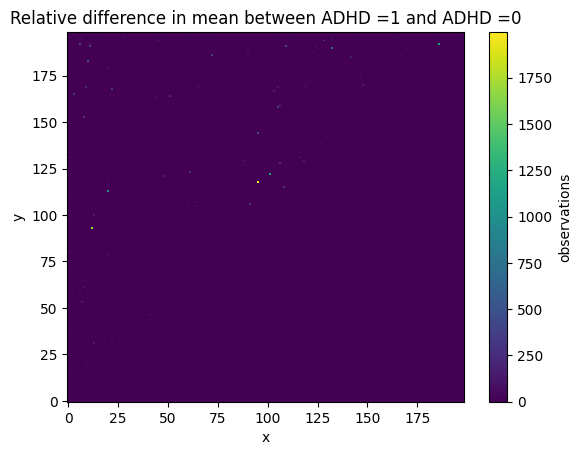

In [124]:
relative_diff.transpose("y", "x").plot()
plt.title('Relative difference in mean between ADHD =1 and ADHD =0')
#abs((grouped_mean.sel(adhd_label=1) - grouped_mean.sel(adhd_label=0))/grouped_mean.sel(adhd_label=0)).plot()

In [119]:
ds2 = relative_diff
#abs((grouped_mean.sel(adhd_label=1) - grouped_mean.sel(adhd_label=0))/grouped_mean.sel(adhd_label=0))

In [120]:
flat_values = ds2.values.flatten()
# Ensure no NaNs are affecting sorting
valid_mask = ~np.isnan(flat_values)
sorted_indices = np.argsort(flat_values[valid_mask])[-20:]  # Get top 5 indices


In [121]:
# Convert indices back to (x, y) coordinates
x_dim, y_dim = ds2.sizes["x"], ds2.sizes["y"]
valid_indices = np.where(valid_mask)[0]  # Map to valid index positions
top_5_coords = [np.unravel_index(valid_indices[idx], (x_dim, y_dim)) for idx in sorted_indices]

# Get the top 5 values
top_5_values = flat_values[valid_mask][sorted_indices]

# Print results
for i, ((x, y), value) in enumerate(zip(top_5_coords, top_5_values)):
    print(f"Rank {i+1}: (x={x}, y={y}) -> Value: {value}")

Rank 1: (x=106, y=128) -> Value: 285.9147059399992
Rank 2: (x=106, y=159) -> Value: 286.66835153071344
Rank 3: (x=8, y=153) -> Value: 303.79858342043065
Rank 4: (x=91, y=106) -> Value: 311.3927616311057
Rank 5: (x=108, y=115) -> Value: 314.2208353303954
Rank 6: (x=22, y=168) -> Value: 314.69921194908915
Rank 7: (x=3, y=165) -> Value: 342.6979098416633
Rank 8: (x=11, y=191) -> Value: 352.36266604719134
Rank 9: (x=72, y=186) -> Value: 355.32310296717486
Rank 10: (x=95, y=144) -> Value: 390.29338446181345
Rank 11: (x=105, y=158) -> Value: 393.4165720914769
Rank 12: (x=6, y=192) -> Value: 397.00057740637334
Rank 13: (x=109, y=191) -> Value: 437.05649471510435
Rank 14: (x=10, y=183) -> Value: 574.720249835719
Rank 15: (x=132, y=190) -> Value: 714.7017719761764
Rank 16: (x=20, y=113) -> Value: 1044.82137241359
Rank 17: (x=101, y=122) -> Value: 1122.0614125660381
Rank 18: (x=186, y=192) -> Value: 1124.7419461176216
Rank 19: (x=12, y=93) -> Value: 1653.8430573405085
Rank 20: (x=95, y=118) -> V

In [122]:
denom = grouped_mean.sel(adhd_label=0)
print("Min denominator:", denom.min().values)
print("Mean denominator:", denom.mean().values)
print("Max denominator:", denom.max().values)

Min denominator: -0.029741855594624122
Mean denominator: 0.0022565311725630693
Max denominator: 0.32697783968527283


In [ ]:
Top 7 brain regions where the % difference across ADHD =1 and ADHD =0
- Top region is more than double the next region (x=95,y=118)
- Cut in half again from 7-8th position, going from >1000 to under 600